In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df['is_canceled'].value_counts() #target variable

0    75166
1    44224
Name: is_canceled, dtype: int64

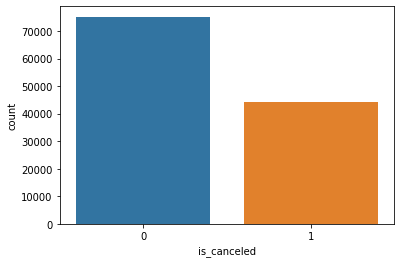

In [5]:
sns.countplot(df['is_canceled'])

In [6]:
df.shape

(119390, 32)

# Missing Values

In [7]:
df.isnull().sum()*100/df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [10]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [11]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [12]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [13]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

## Fillna with replace func. 

In [14]:
df['agent'].replace(np.nan,df['agent'].mean(),inplace=True)
df['company'].replace(np.nan,df['company'].mean(),inplace=True)

# country and childrer we apply interpolite

In [15]:
df['children'].interpolate(method ='linear', limit_direction ='forward',inplace=True) 

In [16]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

# Object İnterpolite 

In [17]:
country_list = df.country

for i in range(0, len(country_list)):
    if pd.isnull(country_list[i]):
        country_list[i] = country_list[i-1]
        


In [18]:
df.isnull().sum()*100/df.shape[0]

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

In [113]:
df=df.to_csv('Clear_Hotel_Booking.csv',encoding='utf8')

# EDA 

In [19]:
import pandas as dp 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

In [20]:
df= pd.read_csv('Clear_Hotel_Booking.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.000000,0.000000,1.000000,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.000000,69.000000,160.000000,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.000000,2016.000000,2017.000000,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.000000,28.000000,38.000000,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.000000,16.000000,23.000000,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.000000,1.000000,2.000000,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.000000,2.000000,3.000000,50.0
adults,119390.0,1.856403,0.579261,0.00,2.000000,2.000000,2.000000,55.0
children,119390.0,0.103886,0.398555,0.00,0.000000,0.000000,0.000000,10.0
babies,119390.0,0.007949,0.097436,0.00,0.000000,0.000000,0.000000,10.0


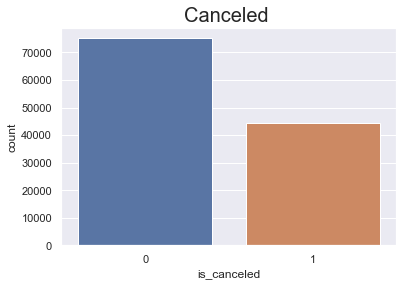

In [22]:
sns.set(style = "darkgrid")
plt.title("Canceled ", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data = df)

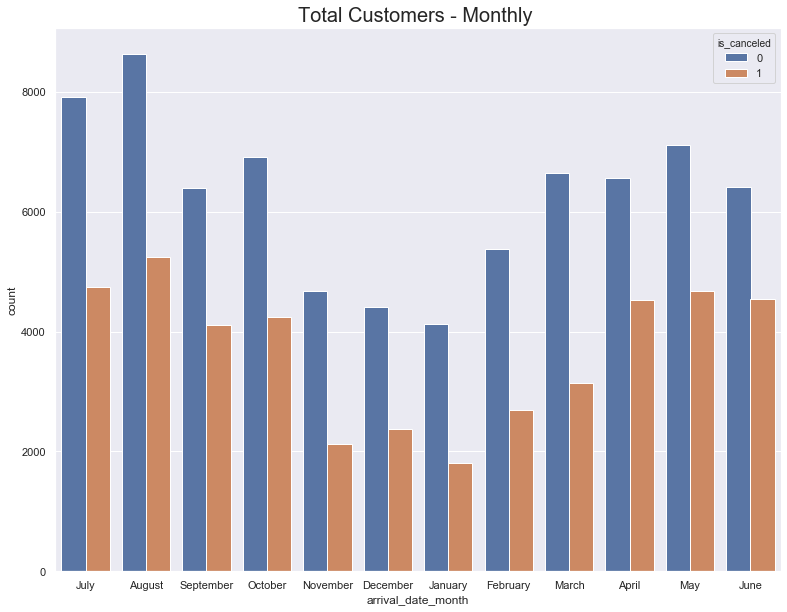

In [23]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'is_canceled', data = df)

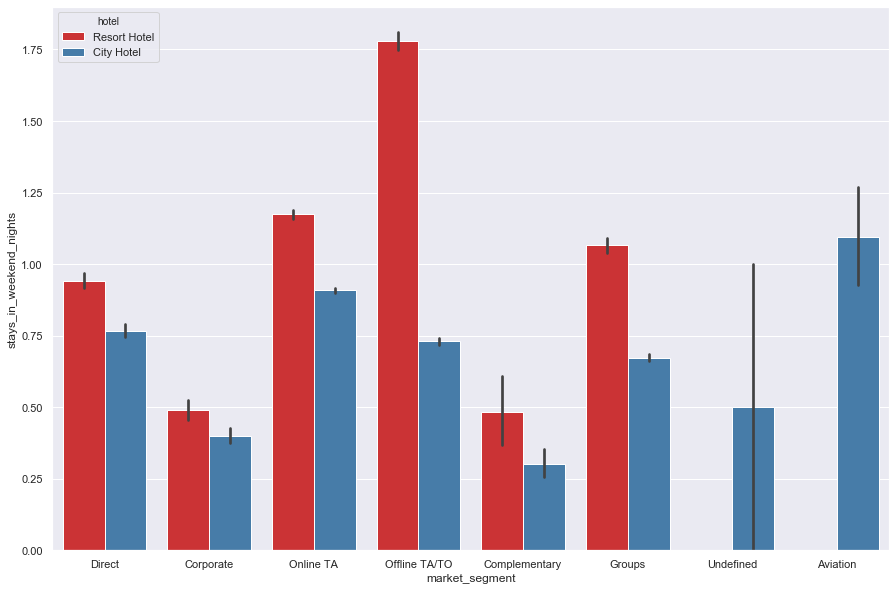

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "hotel", palette = 'Set1');

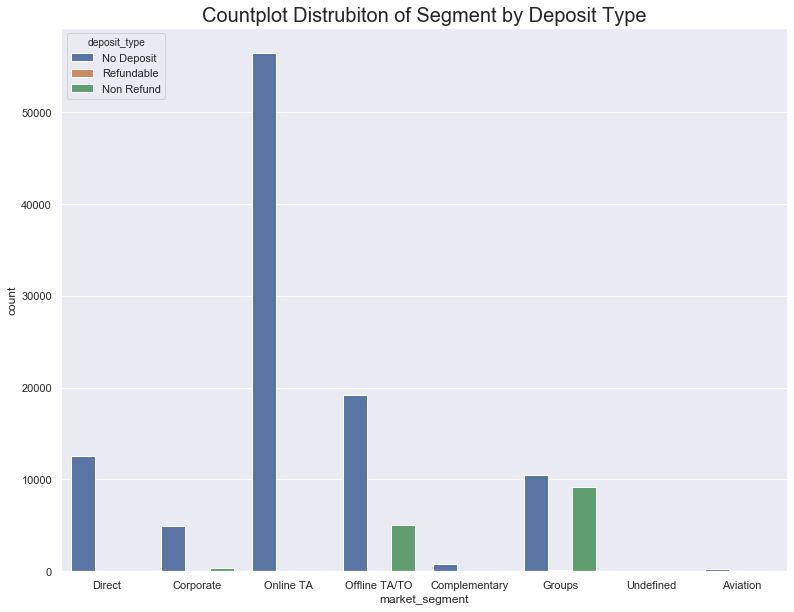

In [25]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

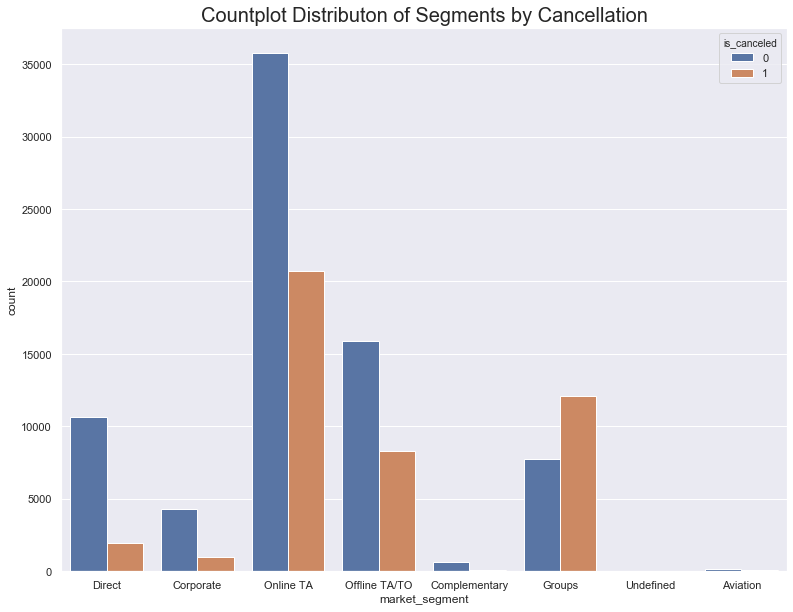

In [26]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

# Lojistic Regresyon

# Model

In [3]:
df = pd.read_csv('Clear_Hotel_Booking.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# Encoding Process

In [5]:
df['hotel'] = pd.get_dummies(df['hotel'])
df['meal'].replace({'BB':0,'FB':1, 'HB':2,'SC':3,'Undefined':4},inplace=True)
df['market_segment'].replace({'Direct':0,'Corporate':1, 'Online TA':2,'Offline TA/TO':3,'Undefined':4,"Groups":5,"Complementary":6,"Aviation":7},inplace=True)
df['distribution_channel'].replace({'Direct':0,'Corporate':1, 'TA/TO':2,'GDS':3,'Undefined':4},inplace=True)
df['deposit_type'].replace({'No Deposit':0,'Refundable':1, 'Non Refund':2},inplace=True)
df['customer_type'].replace({'Transient':0,'Contract':1, 'Transient-Party':2,"Group":3},inplace=True)
df['reservation_status'].replace({'Check-Out':0,'Canceled':1, 'No-Show':2},inplace=True)


In [6]:
# You should use LAbel in Country,reserved_room_type,assigned_room_type, feature

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])
df['assigned_room_type']= le.fit_transform(df['assigned_room_type'])
df['assigned_room_type'].unique()

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9], dtype=int64)

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,July,27,1,0,0,2,...,0,86.693382,189.266735,0,0,0.0,0,0,0,2015-07-01
1,0,0,737,2015,July,27,1,0,0,2,...,0,86.693382,189.266735,0,0,0.0,0,0,0,2015-07-01
2,0,0,7,2015,July,27,1,0,1,1,...,0,86.693382,189.266735,0,0,75.0,0,0,0,2015-07-02
3,0,0,13,2015,July,27,1,0,1,1,...,0,304.000000,189.266735,0,0,75.0,0,0,0,2015-07-02
4,0,0,14,2015,July,27,1,0,2,2,...,0,240.000000,189.266735,0,0,98.0,0,1,0,2015-07-03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null uint8
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null int64
country                           119390 non-null int32
market_segment                    119390 non-null int64
distribution_channel              119390 non-n

# Model

In [10]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn import tree
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,0.136531,0.075381,0.035267,0.001270,-0.001862,-0.186596,-0.234020,-0.013183,-0.044210,...,-0.072820,0.169493,-0.718520,-0.091656,0.072432,0.012702,0.096719,-0.218873,-0.043390,0.134323
is_canceled,0.136531,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,...,-0.144381,0.480434,-0.077992,-0.003877,0.054186,-0.135819,0.047557,-0.195498,-0.234658,0.980601
lead_time,0.075381,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,...,0.000149,0.380804,-0.065283,0.028188,0.170084,0.162524,-0.063077,-0.116451,-0.095712,0.271044
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,...,0.030872,-0.065953,0.058851,0.062403,-0.056497,-0.199555,0.197580,-0.013684,0.108531,0.015155
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,...,0.005508,0.006818,-0.028306,-0.020959,0.022933,0.063675,0.075791,0.001920,0.026149,0.003113
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,...,0.010613,-0.006803,0.001384,0.010422,0.022728,0.003114,0.030245,0.008683,0.003062,-0.003139
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,...,0.063281,-0.114084,0.131451,0.012798,-0.054151,-0.042925,0.049342,-0.018554,0.072671,0.001646
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,...,0.096209,-0.079553,0.169218,0.038660,-0.002020,-0.037803,0.065237,-0.024859,0.068192,0.024829
adults,-0.013183,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,...,-0.051673,-0.028774,-0.028033,0.041875,-0.008283,-0.093755,0.230641,0.014785,0.122884,0.050610
children,-0.044210,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,...,0.048952,-0.096969,0.039425,0.002923,-0.033271,-0.096135,0.324853,0.056255,0.081736,0.005539


In [28]:
X = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status","required_car_parking_spaces"],axis=1)
y = df['is_canceled']

# Stats Model 

In [29]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.444642
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:               119390
Model:                          Logit   Df Residuals:                   119364
Method:                           MLE   Df Model:                           25
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.3255
Time:                        08:25:51   Log-Likelihood:                -53086.
converged:                       True   LL-Null:                       -78699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hotel                             -0.1025      0.025     -4.065      0.000      -0.152      -0.053
lead_time                          0.0041   9.09e-05     45.361      0.000       0.004       0.004
arrival_date_week_number          -0.0083      0.001    -14.180      0.000      -0.009      -0.007
arrival_date_day_of_month         -0.0046      0.001     -5.389      0.000      -0.006      -0.003
stays_in_weekend_nights            0.0192      0.009      2.195      0.028       0.002       0.036
stays_in_week_nights               0.0182      0.005      3.961      0.000       0.009       0.027
adults                             0.0211      0.013      1.668      0.095      -0.004       0.046
children                           0.1675      0.019      8.926      0.000       0.131       0.204
babies                            -0.0097      0.085     -0.114      0.910      -0.177       0.158
meal                               0.0101      0.007      1.458      0.145      -0.003       0.024
country                            0.0085      0.000     49.545      0.000       0.008       0.009
market_segment                    -0.1321      0.010    -13.341      0.000      -0.152      -0.113
distribution_channel               0.5115      0.016     32.596      0.000       0.481       0.542
is_repeated_guest                 -1.1670      0.078    -14.868      0.000      -1.321      -1.013
previous_cancellations             2.4208      0.060     40.216      0.000       2.303       2.539
previous_bookings_not_canceled    -0.5671      0.026    -21.469      0.000      -0.619      -0.515
reserved_room_type                 0.4917      0.013     38.588      0.000       0.467       0.517
assigned_room_type                -0.5459      0.012    -44.484      0.000      -0.570      -0.522
booking_changes                   -0.3792      0.015    -24.596      0.000      -0.409      -0.349
deposit_type                       2.3260      0.051     45.514      0.000       2.226       2.426
agent                             -0.0010      0.000     -8.855      0.000      -0.001      -0.001
company                           -0.0103      0.000    -44.032      0.000      -0.011      -0.010
days_in_waiting_list              -0.0018      0.000     -3.693      0.000      -0.003      -0.001
customer_type                     -0.4620      0.012    -37.231      0.000      -0.486      -0.438
adr                                0.0040      0.000     20.681      0.000       0.004       0.004
total_of_special_requests         -0.6086      0.011    -55.808      0.000      -0.630      -0.587
==================================================================================================
"""

# Scikit-learn

In [30]:
from sklearn.linear_model import LogisticRegression

loj = LogisticRegression()
loj_model = loj.fit(X,y)
loj_model

LogisticRegression()

In [31]:
loj_model.intercept_

array([-0.12203815])

In [32]:
loj_model.coef_

array([[ 3.97489853e-03,  4.99740028e-03, -6.75673245e-03,
        -1.27169468e-02,  7.47376566e-03,  6.95575316e-03,
         1.25821907e-04,  7.07660601e-02, -1.32671494e-02,
        -1.03719648e-01,  9.94031586e-03,  2.30934389e-01,
         2.62176183e-01, -9.23499022e-02,  3.32723200e-01,
        -5.23989315e-01,  4.30054796e-01, -4.81287003e-01,
        -4.62523376e-01,  1.01749457e+00, -7.82273535e-04,
        -1.06331268e-02, -6.59869962e-03, -8.68880710e-01,
         5.06408751e-03, -7.77049885e-01]])

# Estimate & Model Tuning

In [33]:
y_pred = loj_model.predict(X)

In [34]:
confusion_matrix(y,y_pred)

array([[66742,  8424],
       [18529, 25695]], dtype=int64)

In [35]:
accuracy_score(y,y_pred)

0.7742440740430522

In [36]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     75166
           1       0.75      0.58      0.66     44224

    accuracy                           0.77    119390
   macro avg       0.77      0.73      0.74    119390
weighted avg       0.77      0.77      0.77    119390



In [37]:
loj_model.predict(X)[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [40]:
loj_model.predict_proba(X)[:10]

array([[0.6976709 , 0.3023291 ],
       [0.33732935, 0.66267065],
       [0.91307143, 0.08692857],
       [0.73808745, 0.26191255],
       [0.75793154, 0.24206846],
       [0.75793154, 0.24206846],
       [0.64611449, 0.35388551],
       [0.83579442, 0.16420558],
       [0.52626647, 0.47373353],
       [0.31287139, 0.68712861]])

In [59]:
loj_model.predict_proba(X)[0:10][:,0:1]

array([[0.6976709 ],
       [0.33732935],
       [0.91307143],
       [0.73808745],
       [0.75793154],
       [0.75793154],
       [0.64611449],
       [0.83579442],
       [0.52626647],
       [0.31287139]])

In [60]:
y_probs= loj_model.predict_proba(X)
y_probs=y_probs[:,1]
y_probs[0:5]

array([0.3023291 , 0.66267065, 0.08692857, 0.26191255, 0.24206846])

In [61]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs ]

In [62]:
y_pred [0:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [63]:
confusion_matrix(y,y_pred)

array([[66742,  8424],
       [18529, 25695]], dtype=int64)

In [64]:
accuracy_score(y, y_pred)

0.7742440740430522

In [65]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     75166
           1       0.75      0.58      0.66     44224

    accuracy                           0.77    119390
   macro avg       0.77      0.73      0.74    119390
weighted avg       0.77      0.77      0.77    119390



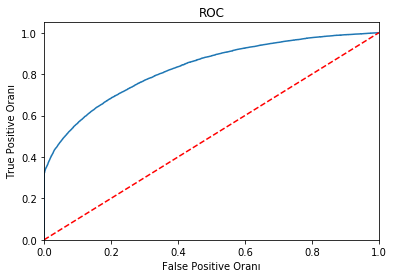

In [66]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Modeli Doğrulamak

In [68]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.20 , random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

loj=LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [71]:
accuracy_score(y_test , loj_model.predict(X_test))  # test ratio

0.7910210235363095

In [73]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean() # we apply validation test rate

0.792151320069135

# Optimize

In [74]:
loj_model= LogisticRegression()
print(loj_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Grid Seacrh 

In [75]:
parametreler = {'C':[10**x for x in range(-5,5,1)],
               "penalty":['l1',"l2"]}

In [76]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=loj_model , param_grid=parametreler , cv=10)

grid_cv.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [77]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 10000, 'penalty': 'l2'}
En iyi skor         :  0.7418041712036184


In [78]:
results = grid_cv.cv_results_
df = pd.DataFrame(results)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010158,0.006686,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,1.271919,0.021272,0.007223,0.005128,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.662200,0.681715,0.713628,0.659687,0.649301,0.642600,0.634643,0.743027,0.722087,0.701147,0.681003,0.035274,10
2,0.013343,0.003671,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
3,1.275811,0.025525,0.010254,0.006057,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.688165,0.695452,0.775861,0.692604,0.702823,0.707011,0.709858,0.782394,0.735572,0.749812,0.723955,0.033048,9
4,0.016105,0.005504,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [79]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
19,l2,10000,0.741804
13,l2,10,0.736159
17,l2,1000,0.736075
15,l2,100,0.735263
5,l2,0.001,0.734417
11,l2,1,0.734056
7,l2,0.01,0.733948
9,l2,0.1,0.733252
3,l2,0.0001,0.723955
1,l2,1e-05,0.681003


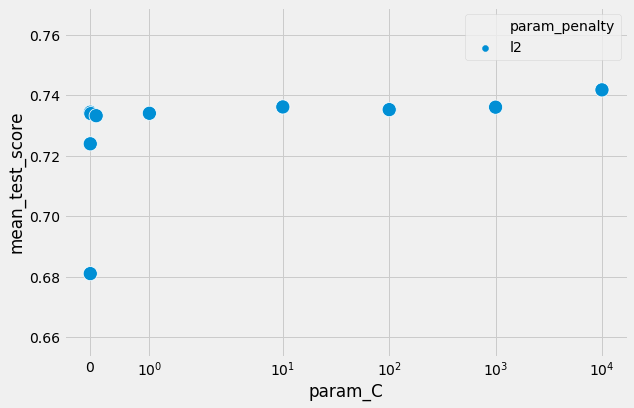

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.show()

# RandomizedSearchCV

In [81]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator=loj_model,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [83]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 0.001}
Tüm hassasiyet değerleri   :  [0.70669779 0.71132599 0.70769777 0.69858739        nan 0.70551108
        nan        nan        nan        nan]
En iyi hassasiyet değeri   :  0.7113259908591363


In [84]:
results = rs_cv.cv_results_
df_rs = pd.DataFrame(results)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
1,l2,0.001,0.711326
2,l2,10,0.707698
0,l2,0.0001,0.706698
5,l2,1000,0.705511
3,l2,1,0.698587
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,1e-05,NaN


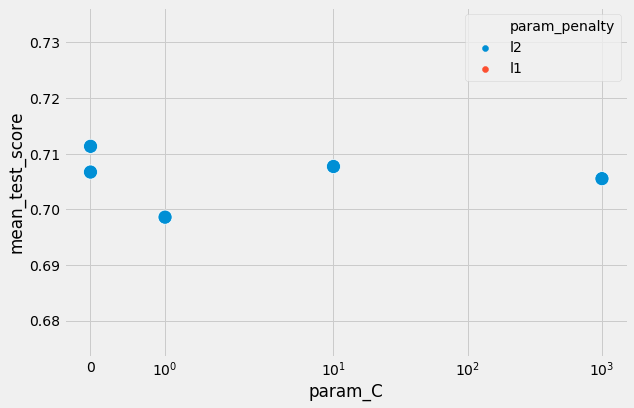

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.show()